In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [8]:

# Load the dataset
df = pd.read_csv('Cardiotocographic.csv')  # Adjust the path to your dataset

# Display the first few rows to understand its structure
df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [9]:

# Data Cleaning and Preparation

# 1. Check for missing values
missing_data = df.isnull().sum()

# 2. Handle missing values (Example: Imputation or Deletion)
# Impute missing values with median (for numerical columns)
df = df.fillna(df.median())

# 3. Check and correct data types
df.dtypes

# If any column is stored as a string but should be numeric, convert it:
# df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')


LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [10]:

# 4. Detect and handle outliers (Z-score method or IQR method)
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
outliers = (z_scores > 3)  # Thresholding with Z-score > 3
df_no_outliers = df[(z_scores < 3).all(axis=1)]  # Remove outliers

# Statistical Summary

# 1. Provide a statistical summary
stat_summary = df.describe()

# 2. Calculate additional statistics
median_values = df.median()
std_dev = df.std()
iqr = df.quantile(0.75) - df.quantile(0.25)

# Display statistical summary
print("Statistical Summary:")
print(stat_summary)


Statistical Summary:
                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.340204     0.003204     0.009894     0.004391     0.001895   
std      11.214379     0.004373     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000002     0.000173    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.0013

<Figure size 1200x800 with 0 Axes>

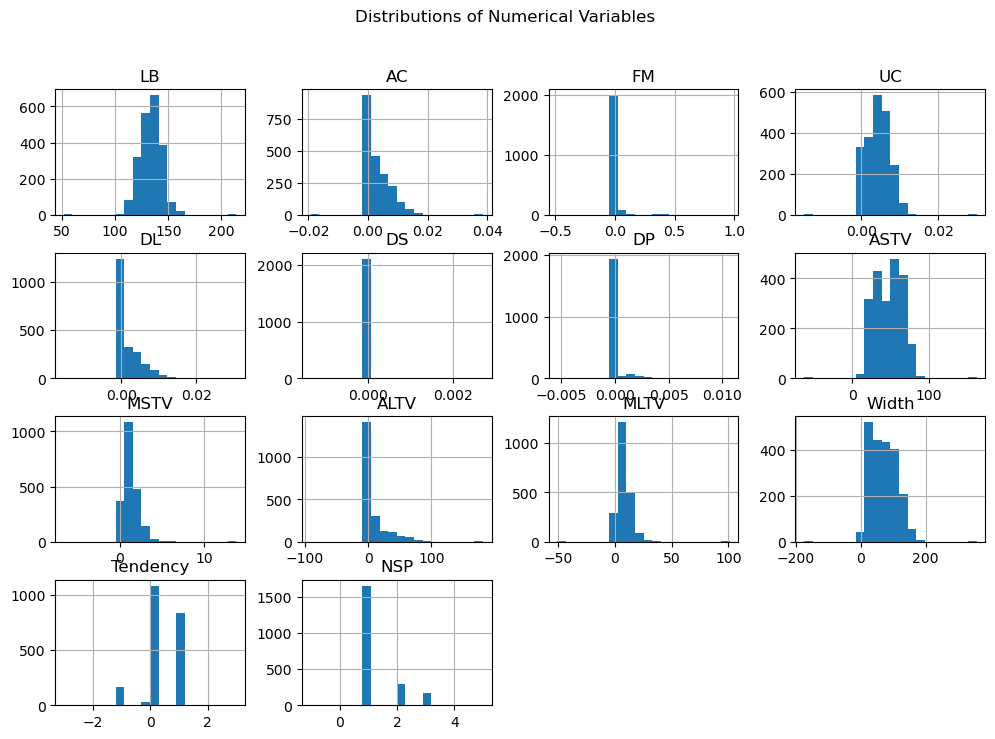

In [11]:

# Data Visualization

# 1. Visualize distributions of numerical variables
plt.figure(figsize=(12, 8))
df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Distributions of Numerical Variables')
plt.show()



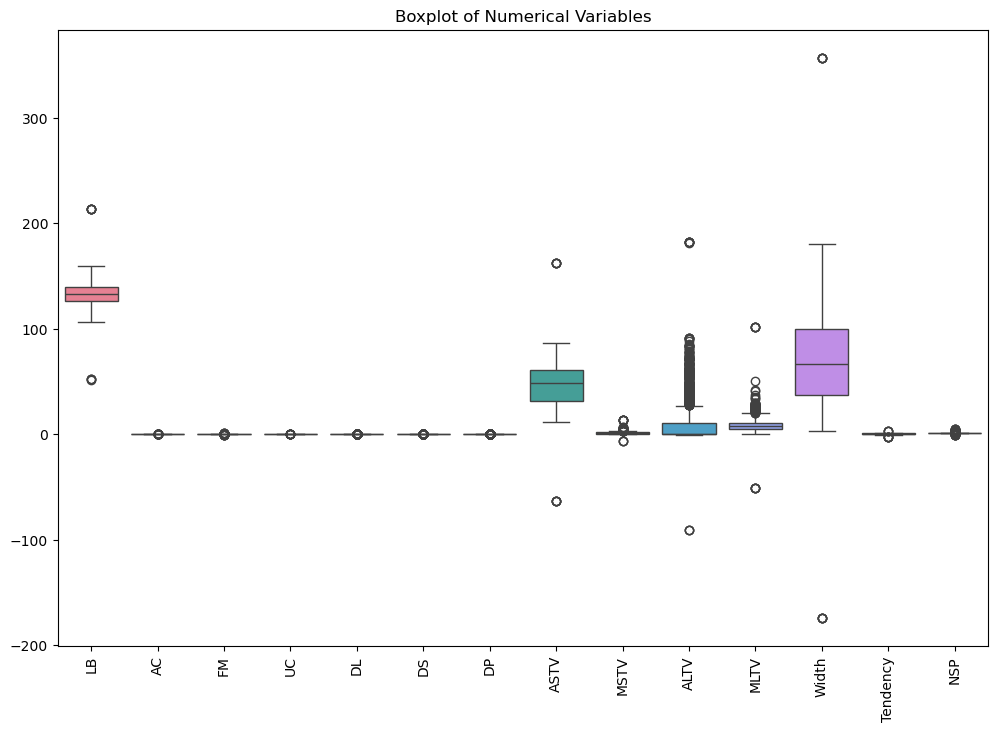

In [12]:
# 2. Visualize with Boxplots for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=90)
plt.show()


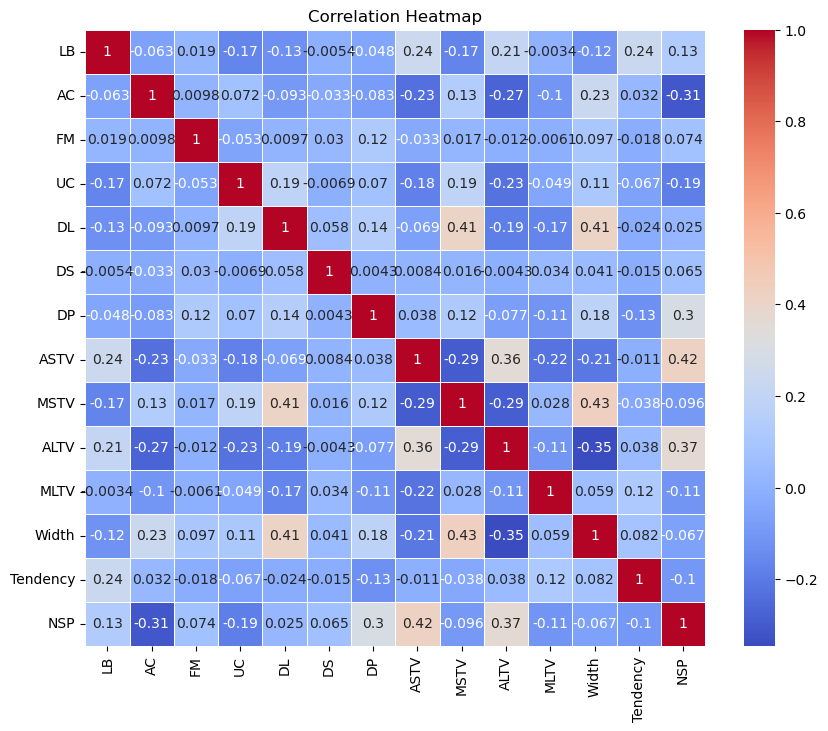

In [13]:

# 3. Visualize Correlation with a Heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



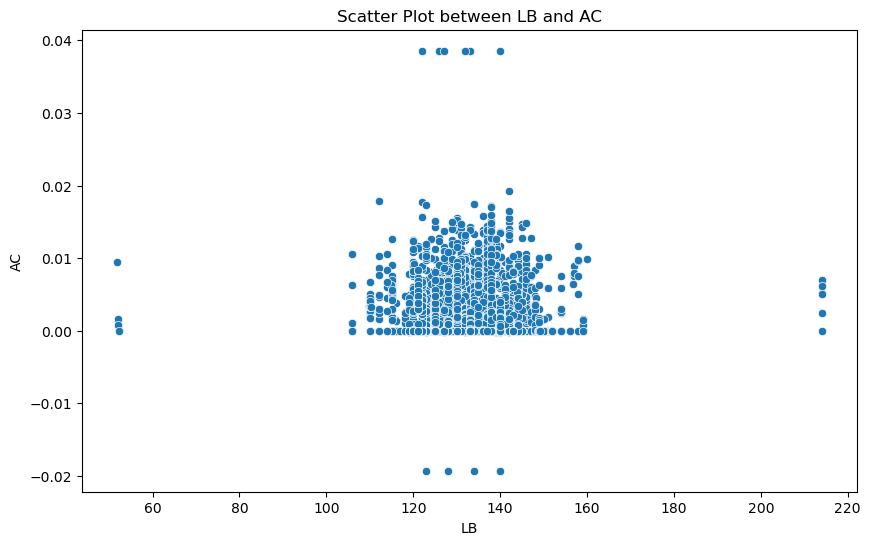

In [14]:
# 4. Create scatter plots to explore relationships between pairs of variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LB', y='AC')
plt.title('Scatter Plot between LB and AC')
plt.show()


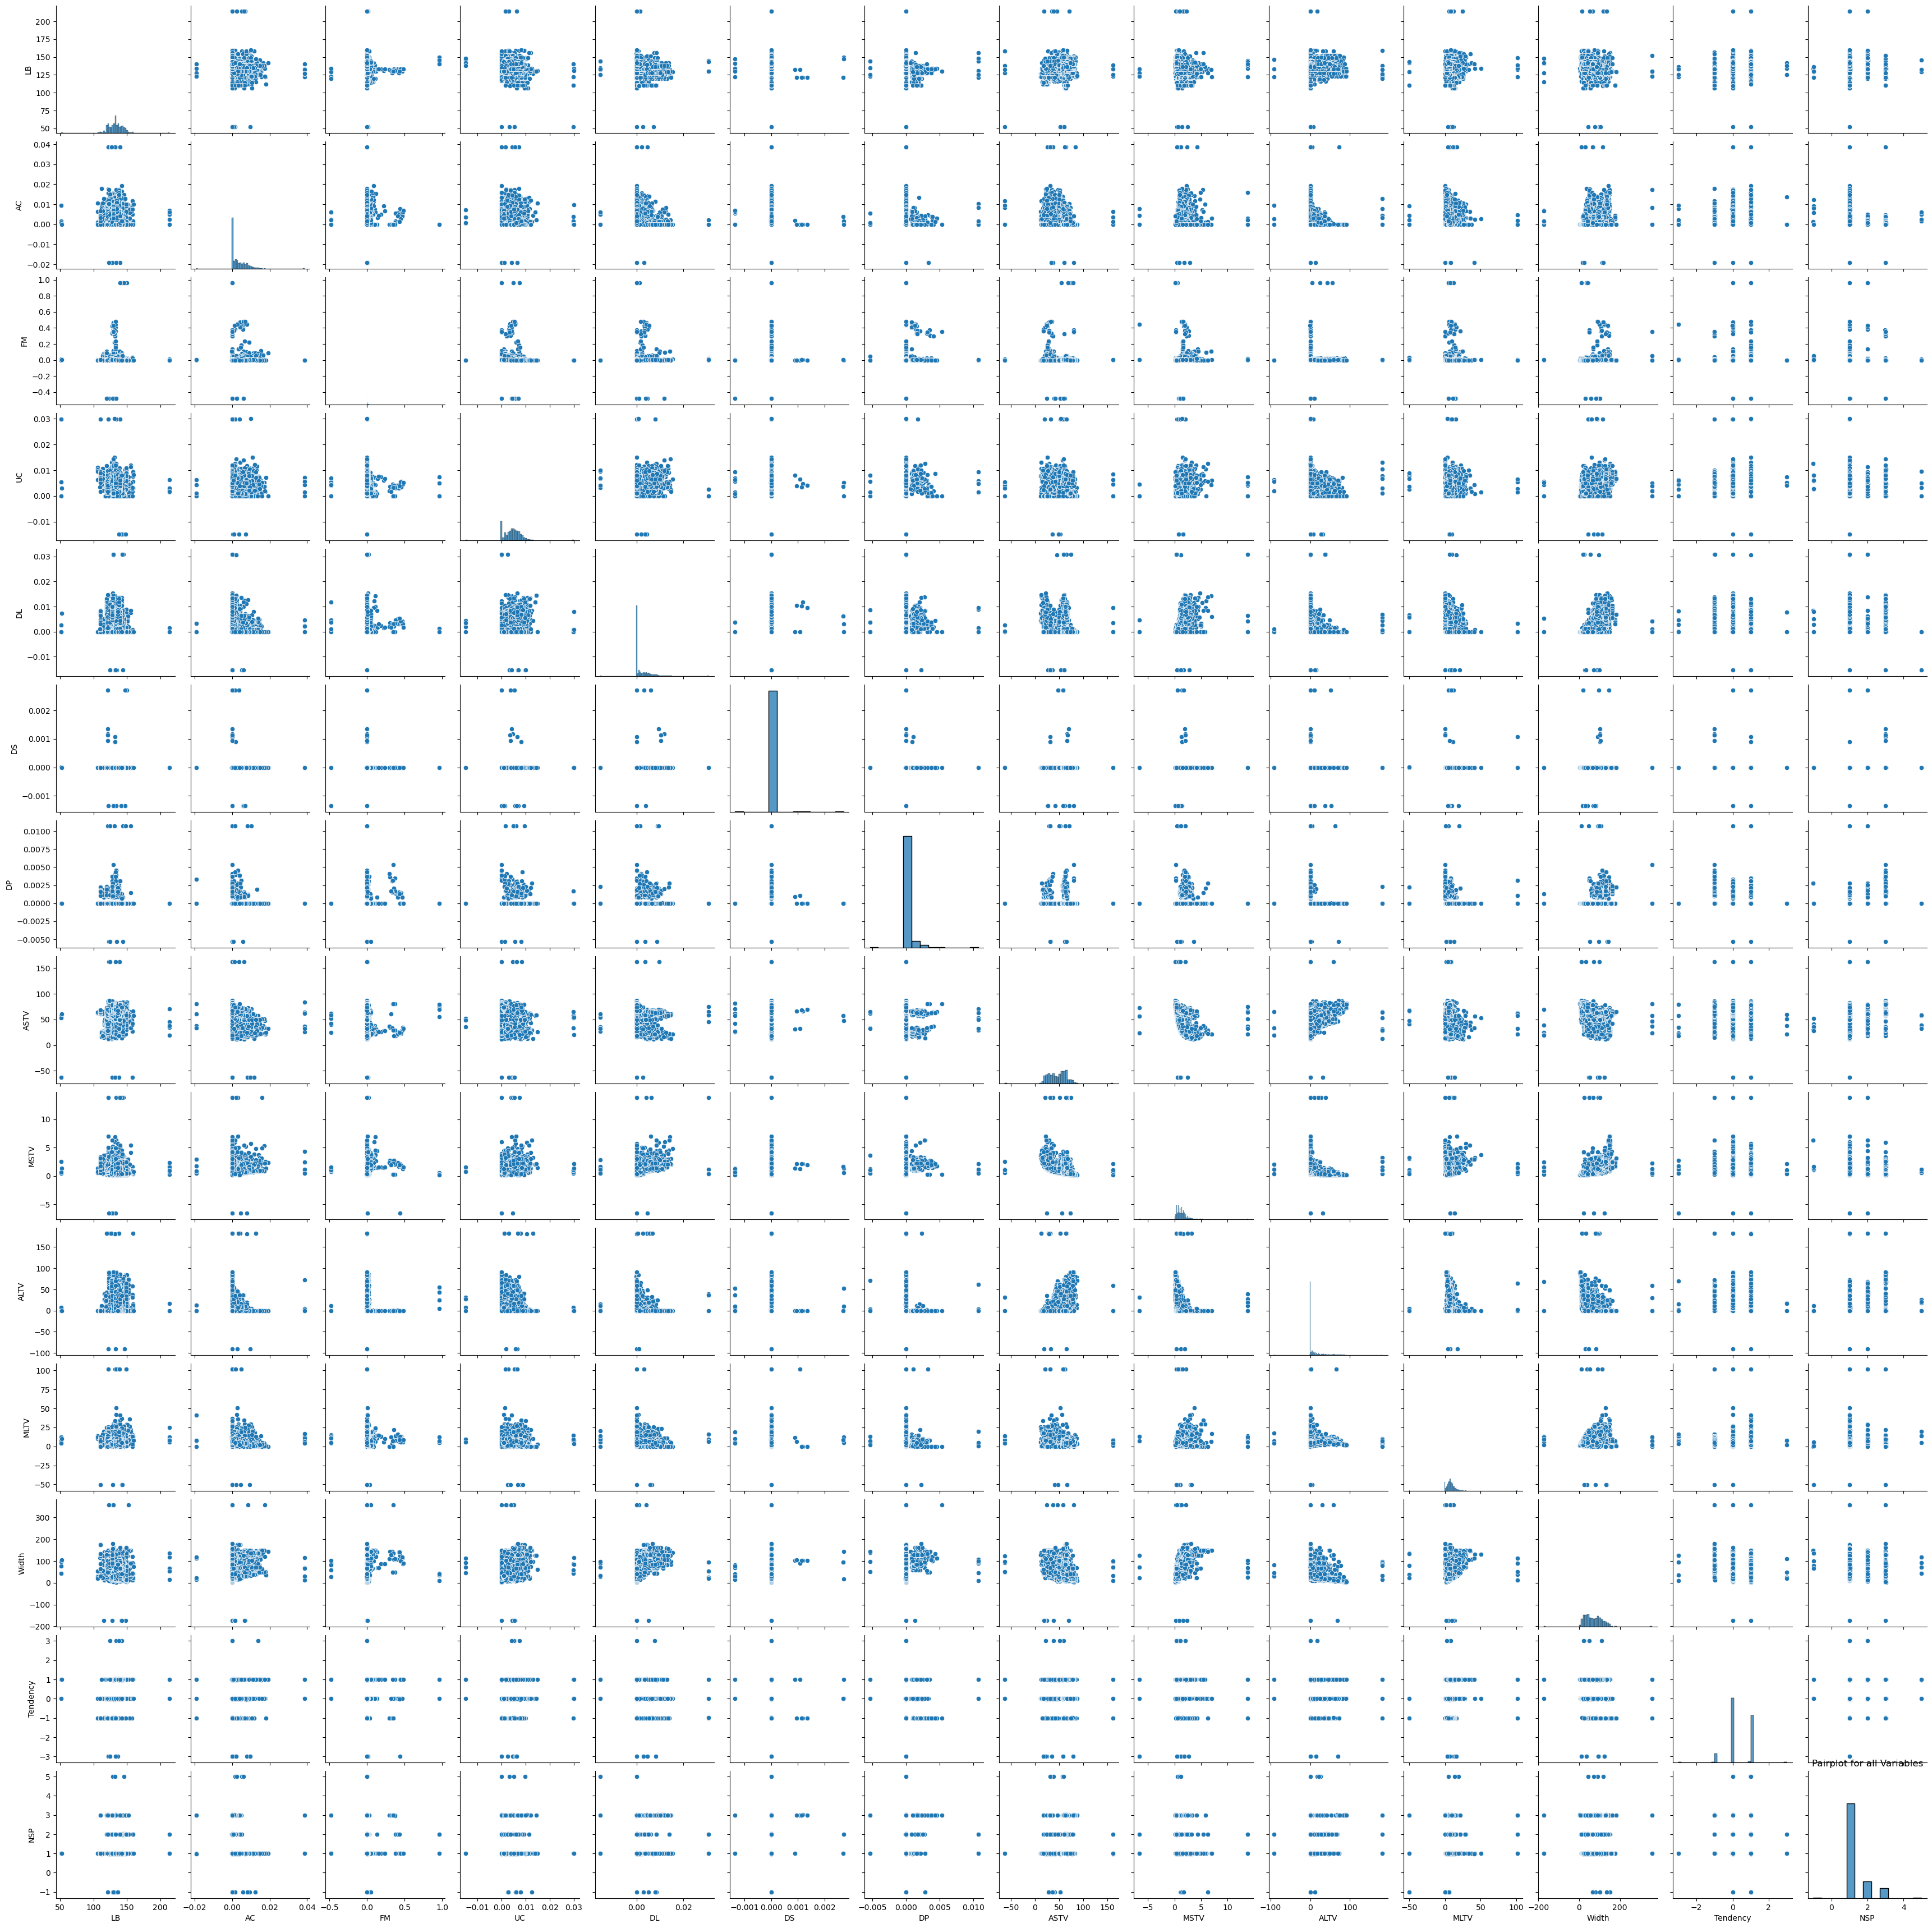

In [16]:

# 5. Advanced visualization: Pairplot to explore pairwise relationships
sns.pairplot(df)
plt.title('Pairplot for all Variables')
plt.show()



In [17]:
# Pattern Recognition and Insights

# 1. Correlations between variables
# Correlation matrix already shown in the heatmap above
# Let's highlight any strong correlations
strong_corr = corr[abs(corr) > 0.7]



In [18]:
# 2. Trends over time (if available): Assuming a time-based column exists (e.g., 'time')
# If there is no time data, this step can be skipped
# plt.plot(df['time'], df['LB'])
# plt.xlabel('Time')
# plt.ylabel('LB')
# plt.title('Trend of LB over Time')
# plt.show()


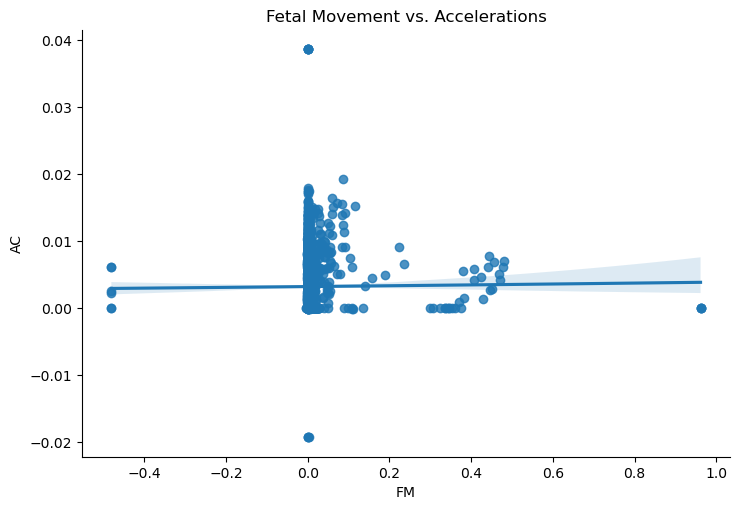

In [19]:

# 3. Detect patterns in relationships
# Example: Checking the relationship between Fetal Movement (FM) and Accelerations (AC)
sns.lmplot(x='FM', y='AC', data=df, aspect=1.5, logistic=True)
plt.title('Fetal Movement vs. Accelerations')
plt.show()


In [ ]:

# Conclusion

# Key Insights:
# 1. Provide a summary of the key findings based on statistical analysis and visualizations
# 2. Discuss any significant correlations or trends identified during the analysis
# 3. Mention any anomalies or outliers and how they might impact analysis

# Example conclusion
print("""
Key Insights:
- The variables like LB, AC, and FM exhibit a range of values, with LB and AC showing possible signs of fetal health.
- Some variables (e.g., DS and DP) show relatively high correlation, which may indicate overlapping features in the dataset.
- Outliers were removed based on Z-scores, which could be examined further for deeper insight.
""")
